In [97]:
import sys
from pathlib import Path
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [98]:
project_dir = '../'
with open(os.path.join(project_dir, 'reports/data/simon_36/EEGNet_SSVEP.pkl'), 'rb') as f:
    eegnet_history = pickle.load(f)
with open(os.path.join(project_dir, 'reports/data/simon_36/EEGNet_SSVEP_Spectral.pkl'), 'rb') as f:
    eegnet_spectral_history = pickle.load(f)
with open(os.path.join(project_dir, 'reports/data/simon_36/EEGNet_SSVEP_PCA.pkl'), 'rb') as f:
    eegnet_pca_history = pickle.load(f)

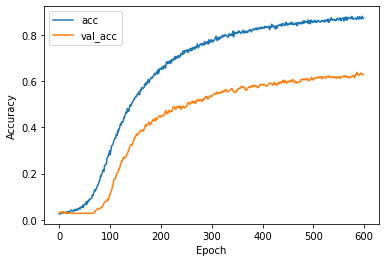

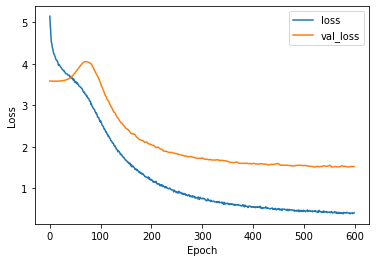

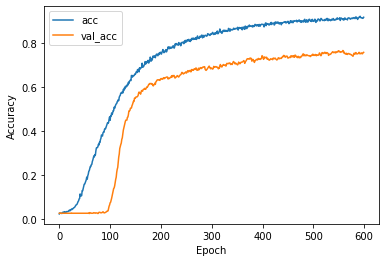

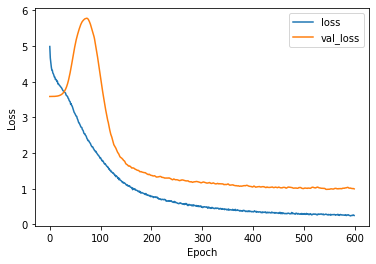

In [99]:
def plot_learning_curve(history, epoch_start=0):
    plt.figure()
    capsize= 5
    mean_acc = np.array(history['acc']).mean(axis=0)
    std_acc = np.array(history['acc']).std(axis=0)
    val_mean_acc = np.array(history['val_acc']).mean(axis=0)
    val_std_acc = np.array(history['val_acc']).std(axis=0)
    xticks = np.arange(epoch_start, len(mean_acc), 1)
    plt.errorbar(xticks, mean_acc[epoch_start:], label='acc', capsize=capsize)
    plt.errorbar(xticks, val_mean_acc[epoch_start:], label='val_acc', capsize=capsize)
    # plt.xticks(xticks)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure()
    capsize= 5
    mean_loss = np.array(history['loss']).mean(axis=0)
    std_loss = np.array(history['loss']).std(axis=0)
    val_mean_loss = np.array(history['val_loss']).mean(axis=0)
    val_std_loss = np.array(history['val_loss']).std(axis=0)
    xticks = np.arange(epoch_start, len(mean_loss), 1)
    plt.errorbar(xticks, mean_loss[epoch_start:], label='loss', capsize=capsize)
    plt.errorbar(xticks, val_mean_loss[epoch_start:], label='val_loss', capsize=capsize)
    # plt.xticks(xticks)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend();

plot_learning_curve(eegnet_history)
plot_learning_curve(eegnet_spectral_history)

Use the maximum accuracy from all epochs as final accuracy

,EEGNet,EEGNet+Spectral-Filter,EEGNet+PCA-Filter
count,10.000000,10.000000,10.000000
mean,0.651389,0.790278,0.634722
std,0.108070,0.096990,0.069614
min,0.416667,0.555556,0.500000
25%,0.625000,0.770833,0.600694
50%,0.687500,0.805556,0.625000
75%,0.718750,0.854167,0.687500
max,0.763889,0.888889,0.736111


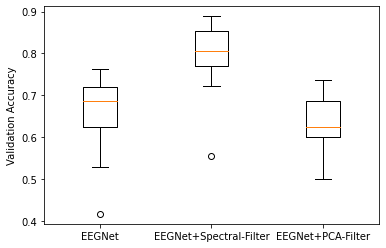

In [100]:
eegnet_val_accs = np.max(eegnet_history['val_acc'], axis=1)
eegnet_val_spectral_accs = np.max(eegnet_spectral_history['val_acc'], axis=1)
eegnet_val_pca_accs = np.max(eegnet_pca_history['val_acc'], axis=1)
f, ax = plt.subplots()
ax.boxplot([eegnet_val_accs, eegnet_val_spectral_accs, eegnet_val_pca_accs])
ax.set_xticklabels(['EEGNet', 'EEGNet+Spectral-Filter', 'EEGNet+PCA-Filter'])
ax.set_ylabel('Validation Accuracy');

df = pd.DataFrame(np.stack([eegnet_val_accs, eegnet_val_spectral_accs, eegnet_val_pca_accs], axis=1))
df.columns = ['EEGNet', 'EEGNet+Spectral-Filter', 'EEGNet+PCA-Filter']
df.describe()

,EEGNet,EEGNet+Spectral-Filter,EEGNet+PCA-Filter
count,10.000000,10.000000,10.000000
mean,0.898611,0.939043,0.868981
std,0.009869,0.003353,0.011763
min,0.884259,0.933642,0.844136
25%,0.893519,0.937114,0.864583
50%,0.897377,0.938272,0.867284
75%,0.906636,0.939815,0.879630
max,0.915123,0.944444,0.882716


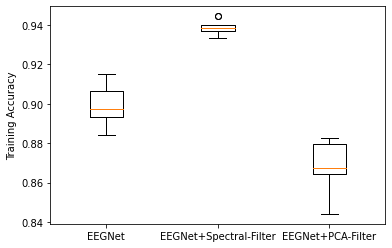

In [101]:
eegnet_val_accs = np.max(eegnet_history['acc'], axis=1)
eegnet_val_spectral_accs = np.max(eegnet_spectral_history['acc'], axis=1)
eegnet_val_pca_accs = np.max(eegnet_pca_history['acc'], axis=1)
f, ax = plt.subplots()
ax.boxplot([eegnet_val_accs, eegnet_val_spectral_accs, eegnet_val_pca_accs])
ax.set_xticklabels(['EEGNet', 'EEGNet+Spectral-Filter', 'EEGNet+PCA-Filter'])
ax.set_ylabel('Training Accuracy');

df = pd.DataFrame(np.stack([eegnet_val_accs, eegnet_val_spectral_accs, eegnet_val_pca_accs], axis=1))
df.columns = ['EEGNet', 'EEGNet+Spectral-Filter', 'EEGNet+PCA-Filter']
df.describe()